In [2]:
#Import libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter

In [3]:
# Neural Network as a class
class Neural_Classifier:
    
    # Constructor method
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.__estimator = None 
        self.__history = None 
        self.__figure_name = None
        self.__y_pred = None
        self.__score_train = None
        self.__score_test = None

    
    # Destructor
    def __del__(self):
        print("The Keras Classifier Neural Network has been deleted")
        
    # Create Model
    def create_model(self, opt, fun, init, epo, batch, nn):
        self.opt = opt
        self.fun = fun
        self.init = init
        self.epo = epo
        self.batch = batch
        self.nn = nn
        
        # when X_train (input) is 1 a direct assingment is needed, otherwise there is a problem here inputs= X_train.shape[1]
        if len(self.X_train.shape) == 1:
            inputs= 1
        else: 
            inputs= self.X_train.shape[1]
            
        # Number of categories (outputs)
        outputs = len(Counter(y_test).keys())
    
        # Define the keras base model 
        def baseline_model():
            kerasmodel = Sequential()
            kerasmodel.add(Dense(nn[0], input_dim=inputs, kernel_initializer=init, activation='relu'))
            kerasmodel.add(Dense(nn[1], kernel_initializer=init, activation='relu'))
            kerasmodel.add(Dense(outputs, kernel_initializer=init, activation = fun))
            
            # Compile model 
            kerasmodel.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
            return kerasmodel

        self.__estimator = KerasClassifier(build_fn=baseline_model, epochs=epo, batch_size=batch, verbose=0)
        self.__history = self.__estimator.fit(X_train, y_train)
        
        # Prediction    
        self.__y_pred = self.__estimator.predict(X_test)
        
        # Accuracy of the model with train and test data
        self.__score_train = self.__history.history['accuracy'][epo-1]
        self.__score_test = self.__estimator.score(X_test,y_test, verbose=0)

        
        # Confusion Matrix Labels
        y = np.array(y_test)
        label= np.unique(y)
        
        # Confusion Matrix Plotting
        cmatrix=  confusion_matrix(y_test.values, self.__y_pred)
        self.__figure_name= 'confusionMatrix_NN.png'
        plt.figure(figsize=(10,10))
        fig= sn.heatmap(cmatrix, annot=True, linewidths= 0.5, xticklabels= label, yticklabels=label)
        plt.xlabel('Predicted')
        plt.ylabel('Original')
        plt.title('Neural Network Confusion Matrix')
        plt.savefig(self.__figure_name)
    
    def get_score_train(self):
        return self.__score_train
    
    def get_score_test(self):
        return self.__score_test
    
    def get_figure_name(self):
        return self.__figure_name

    def get_prediction(self, Xdata):
        return self.__estimator.predict(Xdata)

The Keras Classifier Neural Network has been deleted
0.9831933
0.9333333373069763
confusionMatrix_NN.png


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor
1,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor


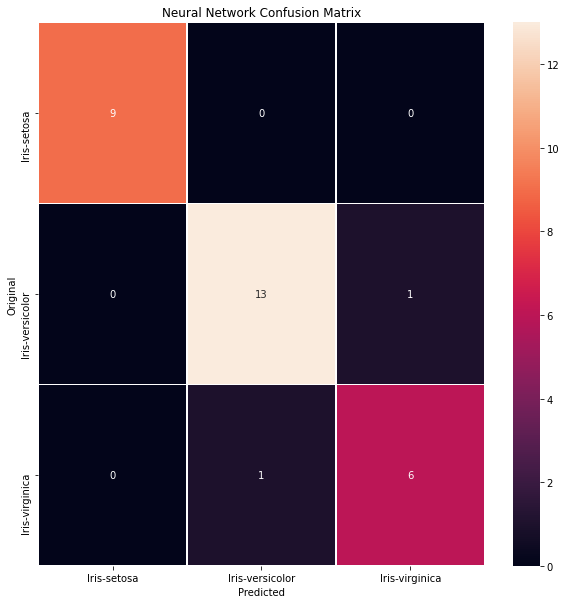

In [6]:
seed = 10
np.random.seed(seed)

df=pd.read_excel('iris.xlsx')

# Inputs and Outputs 
X=df.drop(columns=['class'])        # inputs
y=df['class']                       # outputs

#y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
  
# optimizer to compile the model
opt='Adam'                 # opt = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'RMSprop']

# activation function
fun='sigmoid'              # fun = ['sigmoid', 'softplus', 'softmax']

# initializacion function
init='normal'             # init = ['uniform', 'normal', 'glorot_normal', 'he_normal']  

# epochs (one forward pass and one backward pass of all the training examples) the >> the best from 1 to n of samples
epo=100                    # epo = [100, 200, 300]     (the greater, the better)  
# batch_size (the number of training examples in one forward/backward pass) the << the best (until 1)
batch = 1             # batch = [1,2,3]           (the smaller, the better)
# number of neurons in layer 1 and 2
nn = [10,4]             # nn = first value from 8 to 16 and second value from 4 to 10

nn1 = Neural_Classifier(X_train, X_test, y_train, y_test) # creation of the object
nn1.create_model(opt, fun, init, epo, batch, nn) # creation of the model
acc_train=nn1.get_score_train()
print(acc_train)
acc_test=nn1.get_score_test()
print(acc_test)
fig=nn1.get_figure_name()
print(fig)
pred=nn1.get_prediction(X_test)
results = pd.DataFrame([pred, y_test.values])
results